In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'WDIW Dataset.xlsx'

# Select only poverty data
WDIW_dataset = pd.read_excel(file_path, index_col = 'Country Code')
WDIW_dataset_poverty = WDIW_dataset.iloc[:, [0, 1, 2, 29, 31, 32, 33, 34, 35, 43, 54, 55, 56]]
WDIW_dataset_poverty_float = WDIW_dataset.iloc[:, [29, 31, 32, 33, 34, 35, 43, 54, 55, 56]]

# Select only Hot Rod
Hot_Rod = WDIW_dataset.loc[WDIW_dataset['Cool Name'] == 'Hot Rod']

# Select only poverty data in Hot Rod
Hot_Rod_poverty = Hot_Rod.iloc[:, [0, 1, 2, 29, 31, 32, 33, 34, 35, 43, 54, 55, 56]]
Hot_Rod_poverty_float = Hot_Rod.iloc[:, [29, 31, 32, 33, 34, 35, 43, 54, 55, 56]]
Hot_Rod_poverty_float

,GINI index (World Bank estimate),Income share held by fourth 20%,Income share held by highest 20%,Income share held by lowest 20%,Income share held by second 20%,Income share held by third 20%,Number of people pushed below the $3.10 ($ 2011 PPP) poverty line by out-of-pocket health care expenditure,Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population),Poverty headcount ratio at $3.20 a day (2011 PPP) (% of population),Poverty headcount ratio at national poverty lines (% of population)
Country Code,,,,,,,,,,
BLZ,NaN,NaN,NaN,NaN,NaN,NaN,0.304084,NaN,NaN,NaN
BMU,NaN,NaN,NaN,NaN,NaN,NaN,0.221691,NaN,NaN,NaN
CAN,NaN,NaN,NaN,NaN,NaN,NaN,0.312535,NaN,NaN,NaN
CRI,48.3,20.5,54.0,4.4,8.4,12.8,0.006479,1.0,2.7,20.0
SLV,38.0,22.2,44.7,6.4,11.0,15.7,0.435421,1.9,8.5,29.2
GTM,NaN,NaN,NaN,NaN,NaN,NaN,0.470357,NaN,NaN,NaN
HND,50.5,21.2,54.6,3.2,7.8,13.2,0.468753,17.2,31.6,64.3
MEX,NaN,NaN,NaN,NaN,NaN,NaN,0.175138,NaN,NaN,NaN
NIC,NaN,NaN,NaN,NaN,NaN,NaN,0.288797,NaN,NaN,NaN


In [176]:
# Check percentage of data available in df
100 - WDIW_dataset_poverty.isnull().astype(int).mean()*100

Country Name                                                                                                  100.000000
Hult Region                                                                                                   100.000000
Cool Name                                                                                                     100.000000
GINI index (World Bank estimate)                                                                               11.520737
Income share held by fourth 20%                                                                                11.520737
Income share held by highest 20%                                                                               11.520737
Income share held by lowest 20%                                                                                11.520737
Income share held by second 20%                                                                                11.520737
Income share held by third 20%  

In [177]:
# Check percentage of data available in Hot Rod
100 -WDIW_dataset_poverty.loc[WDIW_dataset['Cool Name'] == 'Hot Rod'].isnull().astype(int).mean()*100

Country Name                                                                                                  100.000000
Hult Region                                                                                                   100.000000
Cool Name                                                                                                     100.000000
GINI index (World Bank estimate)                                                                               36.363636
Income share held by fourth 20%                                                                                36.363636
Income share held by highest 20%                                                                               36.363636
Income share held by lowest 20%                                                                                36.363636
Income share held by second 20%                                                                                36.363636
Income share held by third 20%  

In [178]:
# Create flag columns of the missing data
for cols in WDIW_dataset_poverty:
    if WDIW_dataset_poverty[cols].isnull().astype(int).sum() > 0:
        WDIW_dataset_poverty['m_' + cols] = WDIW_dataset_poverty[cols].isnull().astype(int)
        
WDIW_dataset_poverty

/Users/Piya/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Country Name,Hult Region,Cool Name,GINI index (World Bank estimate),Income share held by fourth 20%,Income share held by highest 20%,Income share held by lowest 20%,Income share held by second 20%,Income share held by third 20%,Number of people pushed below the $3.10 ($ 2011 PPP) poverty line by out-of-pocket health care expenditure,...,Poverty headcount ratio at national poverty lines (% of population),m_GINI index (World Bank estimate),m_Income share held by fourth 20%,m_Income share held by highest 20%,m_Income share held by lowest 20%,m_Income share held by second 20%,m_Income share held by third 20%,m_Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population),m_Poverty headcount ratio at $3.20 a day (2011 PPP) (% of population),m_Poverty headcount ratio at national poverty lines (% of population)
Country Code,,,,,,,,,,,,,,,,,,,,,
AFG,Afghanistan,Middle East & Russia,Mirage,NaN,NaN,NaN,NaN,NaN,NaN,0.397839,...,NaN,1,1,1,1,1,1,1,1,1
ALB,Albania,Eastern Europe,Skids & Mudflap,NaN,NaN,NaN,NaN,NaN,NaN,0.350821,...,NaN,1,1,1,1,1,1,1,1,1
DZA,Algeria,Northern Sub-Saharan Africa,Bumblebee,NaN,NaN,NaN,NaN,NaN,NaN,0.300284,...,NaN,1,1,1,1,1,1,1,1,1
ASM,American Samoa,Australia & Oceania,Cliffhanger,NaN,NaN,NaN,NaN,NaN,NaN,0.161346,...,NaN,1,1,1,1,1,1,1,1,1
AND,Andorra,Eastern Europe,Skids & Mudflap,NaN,NaN,NaN,NaN,NaN,NaN,0.406856,...,NaN,1,1,1,1,1,1,1,1,1
AGO,Angola,Sub-Saharan Africa,Sideswipe,NaN,NaN,NaN,NaN,NaN,NaN,0.613964,...,NaN,1,1,1,1,1,1,1,1,1
ATG,Antigua & Barbuda,Carribean Islands & Parts of Latin America,Ratchet,NaN,NaN,NaN,NaN,NaN,NaN,0.341106,...,NaN,1,1,1,1,1,1,1,1,1
ARG,Argentina,South America,Ironhide,41.2,23.2,46.4,5.1,10.0,15.4,0.676143,...,25.7,0,0,0,0,0,0,0,0,0
ARM,Armenia,Middle East & Russia,Mirage,33.6,20.9,42.4,8.4,12.4,15.9,0.459826,...,25.7,0,0,0,0,0,0,0,0,0


In [179]:
# all data is from 1999
BLZ_missing = [53.3, 19.4, 57.7, 3.2, 7.7, 12, 13.9, 3.2, None]

# No data in BMU
BMU_missing = [None, None, None, None, None, None, None, None, None]

# all data is from 2013
CAN_missing = [34.0, 23.3, 40.7, 6.6, 12.3, 17.0, 0.5, 0.5, None]

# all data is from 2014
GTM_missing = [48.3, 20.1, 53.6, 4.5, 8.6, 13.2, 8.7, 24.2, 59.3]

# all data is from 2016 except Poverty headcount ratio at national poverty lines that is from 2018
MEX_missing = [48.3, 19.3, 54.2, 4.9, 8.8, 12.8, 2.2, 7.9, 41.9]

# all data is from 2014 except Poverty headcount ratio at national poverty lines that is from 2016
NIC_missing = [46.2, 20.0, 52.1, 5.1, 9.2, 13.7, 3.2, 12.8, 24.9]

# all data is from 2016
PAN_missing = [22.1]

# all data is from 2016
USA_missing = [41.5, 22.6, 46.9, 5.0, 10.2, 15.3, 1.2, 1.5, None]



# Combine all missing data
missing_list = [BLZ_missing, BMU_missing, CAN_missing, GTM_missing, MEX_missing, NIC_missing, PAN_missing, USA_missing]
all_missing = []
for country in missing_list:
    all_missing.extend(country)    

    
# Put missing data in df
row = 0
n = 0
while row < 11:
    for col in Hot_Rod_poverty_float:
        if np.isnan(Hot_Rod_poverty_float[col][row]) == True:
            Hot_Rod_poverty_float[col][row] = all_missing[n]
            n += 1
    row += 1  


/Users/Piya/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [180]:
Hot_Rod_poverty_float

,GINI index (World Bank estimate),Income share held by fourth 20%,Income share held by highest 20%,Income share held by lowest 20%,Income share held by second 20%,Income share held by third 20%,Number of people pushed below the $3.10 ($ 2011 PPP) poverty line by out-of-pocket health care expenditure,Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population),Poverty headcount ratio at $3.20 a day (2011 PPP) (% of population),Poverty headcount ratio at national poverty lines (% of population)
Country Code,,,,,,,,,,
BLZ,53.3,19.4,57.7,3.2,7.7,12.0,0.304084,13.9,3.2,NaN
BMU,NaN,NaN,NaN,NaN,NaN,NaN,0.221691,NaN,NaN,NaN
CAN,34.0,23.3,40.7,6.6,12.3,17.0,0.312535,0.5,0.5,NaN
CRI,48.3,20.5,54.0,4.4,8.4,12.8,0.006479,1.0,2.7,20.0
SLV,38.0,22.2,44.7,6.4,11.0,15.7,0.435421,1.9,8.5,29.2
GTM,48.3,20.1,53.6,4.5,8.6,13.2,0.470357,8.7,24.2,59.3
HND,50.5,21.2,54.6,3.2,7.8,13.2,0.468753,17.2,31.6,64.3
MEX,48.3,19.3,54.2,4.9,8.8,12.8,0.175138,2.2,7.9,41.9
NIC,46.2,20.0,52.1,5.1,9.2,13.7,0.288797,3.2,12.8,24.9


In [181]:
# Find the mean for poverty data in Hot Rod
Hot_Rod_poverty_float.mean()

GINI index (World Bank estimate)                                                                              45.830000
Income share held by fourth 20%                                                                               20.950000
Income share held by highest 20%                                                                              51.270000
Income share held by lowest 20%                                                                                4.670000
Income share held by second 20%                                                                                9.210000
Income share held by third 20%                                                                                13.900000
Number of people pushed below the $3.10 ($ 2011 PPP) poverty line by out-of-pocket health care expenditure     0.296292
Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population)                                            5.230000
Poverty headcount ratio at $3.20 a day (

In [182]:
# Find the mean for poverty data in Hot Rod
Hot_Rod_poverty_float.median()

GINI index (World Bank estimate)                                                                              48.300000
Income share held by fourth 20%                                                                               20.700000
Income share held by highest 20%                                                                              53.800000
Income share held by lowest 20%                                                                                4.700000
Income share held by second 20%                                                                                8.700000
Income share held by third 20%                                                                                13.250000
Number of people pushed below the $3.10 ($ 2011 PPP) poverty line by out-of-pocket health care expenditure     0.300344
Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population)                                            2.350000
Poverty headcount ratio at $3.20 a day (

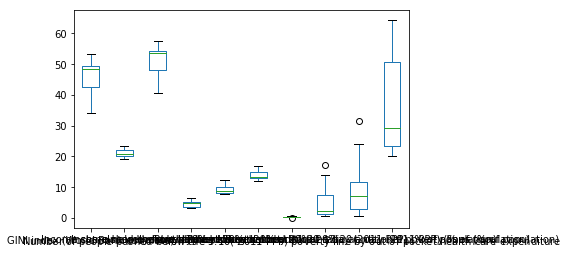

In [192]:
# Box plot of poverty data in Hot Rod
Hot_Rod_poverty_float.plot(kind = 'box')

In [184]:
# Find the mean of column 'Number of people pushed below the $3.10 ($ 2011 PPP) poverty line by out-of-pocket health care expenditure'
WDIW_dataset_poverty.iloc[:,9].mean()

0.32032779186403904

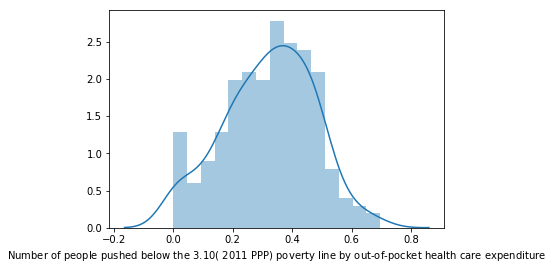

In [195]:
sns.distplot(WDIW_dataset_poverty.iloc[:,9], bins = 15)
# plt.title('Number of people pushed below the $3.10 ($ 2011 PPP) poverty line by out-of-pocket health care expenditure')
# plt.show()

In [186]:
# Get the name in Hult Region
WDIW_dataset['Hult Region'].unique()

array(['Middle East & Russia', 'Eastern Europe',
       'Northern Sub-Saharan Africa', 'Australia & Oceania',
       'Sub-Saharan Africa',
       'Carribean Islands & Parts of Latin America ', 'South America',
       'Western Europe', 'Arabian Peninsula', 'Central Asia',
       'North America & Part of Latin America', 'East/South Africa',
       'East/Southeast Asia', 'World'], dtype=object)

In [187]:
# Find the mean by Hult_region
Hult_Region_list = ['Middle East & Russia', 'Eastern Europe',
                   'Northern Sub-Saharan Africa', 'Australia & Oceania',
                   'Sub-Saharan Africa',
                   'Carribean Islands & Parts of Latin America ', 'South America',
                   'Western Europe', 'Arabian Peninsula', 'Central Asia',
                   'North America & Part of Latin America', 'East/South Africa',
                   'East/Southeast Asia', 'World']

mean_by_Hult_Region = {}

for name in Hult_Region_list:
    mean_by_Hult_Region[name +' mean'] = WDIW_dataset_poverty.iloc[:,9][WDIW_dataset_poverty['Hult Region'] == name].mean()

mean_by_Hult_Region

{'Middle East & Russia mean': 0.3453234559657305,
 'Eastern Europe mean': 0.30629323308616707,
 'Northern Sub-Saharan Africa mean': 0.27071056547312766,
 'Australia & Oceania mean': 0.3229607322628572,
 'Sub-Saharan Africa mean': 0.3062138066652392,
 'Carribean Islands & Parts of Latin America  mean': 0.305231886222502,
 'South America mean': 0.39361772649404314,
 'Western Europe mean': 0.30367930187114145,
 'Arabian Peninsula mean': 0.3891637341737804,
 'Central Asia mean': 0.3099105415803653,
 'North America & Part of Latin America mean': 0.29629160253210673,
 'East/South Africa mean': 0.33588929433005554,
 'East/Southeast Asia mean': 0.3053798154502666,
 'World mean': 0.0}

In [188]:
# Convert to DataFrame
mean_by_Hult_Region_df = pd.DataFrame(data = mean_by_Hult_Region, index = [0])
mean_by_Hult_Region_df

,Middle East & Russia mean,Eastern Europe mean,Northern Sub-Saharan Africa mean,Australia & Oceania mean,Sub-Saharan Africa mean,Carribean Islands & Parts of Latin America mean,South America mean,Western Europe mean,Arabian Peninsula mean,Central Asia mean,North America & Part of Latin America mean,East/South Africa mean,East/Southeast Asia mean,World mean
0,0.345323,0.306293,0.270711,0.322961,0.306214,0.305232,0.393618,0.303679,0.389164,0.309911,0.296292,0.335889,0.30538,0.0


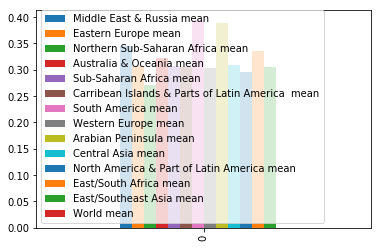

In [189]:
# Compare the mean by Hult Region
mean_by_Hult_Region_df.plot(kind = 'bar')